# Proyecto de Data Science

### Presentacion


Se analizara de varias maneras los resultados del World Endurance Championship en las etapas de Spa y Le Mans, viendo cuales fueron los mejores equipos y que parte pudieron favorecer para las victorias de estos en cada una de las etapas. Viendolo desde distantas varibles presentadas en el Dataset

### Hipotesis

Las etapas de Spa Y Le Mans tienen distintas duraciones, 6 horas y 24 horas respectivamente, en las cuales puede llegar a tener distintas influencias los proveedores de neumaticos, las velocidades promedio, el tiempo de vuelta mas rapida y en la vuelta que se realizo este tiempo. Por lo que se podria plantear que un proveedor de neumaticos es mas eficiente para las carreras de menor duracion o para las de mayor duracion, asi como tambien la exigencia a una mayor velocidad genera un posible mayor desgaste y la mejora o decaida del coche en base a este posible desgaste a traves de las vuelta se podria ver a lo largo de las vueltas basandonos en que vuelta se realizo la mejor vuelta de cada coche

### Glosario

Car: Combinacion del equipo y numero del auto

Overall_position: Posicion general en la que finaliza el auto en la carrera

Class_position: Posicion en la que finaliza el auto en su categoria

Team: Nombre del equipo

Vehicle: Nombre completo del auto

Class: Clase en la que compite

Group: Muestra la subclase en la que compite, en caso que corresponda

Race: Lugar donde se realizo la carrera

Event_duration: Cuanto tiempo dura cada carrera

Season: Año en el que se realizo

Laps: Cuantas vueltas dio cada auto

Total_time: Tiempo que le tomo completar la carrera o retirarse

Gap_first: Diferencia entre el auto y el lider de la carrera

Gap_car_ahead: Tiempo entre el auto y el auto que esta delante

Tyres: Proveedor de ruedas del auto

Status: Si el auto al final de la carrera termino, clasificado, no clasificado o retirado

Fl_lap_number: Numero de la vuelta en la que realizo la vuelta mas rapida personal

Fl_time: Tiempo de la vuelta mas rapida

Fl_kph_average: Velocidad promedio en km/h de la vuelta mas rapida del auto

Driver_1: Nombre del primer piloto

Driver_2: Nombre del segundo piloto

Driver_3: Nombre del tercer piloto

### Analisis de datos

### Data Wrangling

El Data Wrangling consiste en la transformación y limpieza de datos para generar un Dataset más ordenado. Se realizó una descripción estadística general del dataset, se modificarón los valores necesarios y se buscaron datos nulos o duplicados que puedan influir en los procesos posteriores del modelado.

In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [463]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/Preentrega 1/wec_data (1).csv", sep=",")

In [464]:
df.shape

(3035, 22)

In [465]:
df.columns

Index(['car', 'overall_position', 'class_position', 'team', 'vehicle', 'class',
       'group', 'race', 'event_duration', 'season', 'laps', 'total_time',
       'gap_first', 'gap_car_ahead', 'tyres', 'status', 'fl_lap_number',
       'fl_time', 'fl_kph_average', 'driver_1', 'driver_2', 'driver_3'],
      dtype='object')

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car               3035 non-null   object 
 1   overall_position  3035 non-null   int64  
 2   class_position    3035 non-null   int64  
 3   team              3035 non-null   object 
 4   vehicle           3035 non-null   object 
 5   class             3035 non-null   object 
 6   group             428 non-null    object 
 7   race              3035 non-null   object 
 8   event_duration    3035 non-null   int64  
 9   season            3035 non-null   object 
 10  laps              3035 non-null   int64  
 11  total_time        3026 non-null   object 
 12  gap_first         2948 non-null   object 
 13  gap_car_ahead     2946 non-null   object 
 14  tyres             3035 non-null   object 
 15  status            3035 non-null   object 
 16  fl_lap_number     3022 non-null   float64


In [467]:
df.drop(columns = ['group', 'driver_1', 'driver_2', 'driver_3'], inplace=True)
df['gap_car_ahead'] = df['gap_car_ahead'].fillna('Interval')
df['gap_first'] = df['gap_first'].fillna('Interval')
median_fl_kph_average = df['fl_kph_average'].median()
df['fl_kph_average'] = df['fl_kph_average'].fillna(median_fl_kph_average)
mode_fl_time = df['fl_time'].mode()
df['fl_time'] = df['fl_time'].fillna(mode_fl_time)
median_fl_lap_number = df['fl_lap_number'].median()
df['fl_lap_number'] = df['fl_lap_number'].fillna(median_fl_lap_number)
mode_total_time = df['total_time'].mode()
df['total_time'] = df['total_time'].fillna(mode_total_time)

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car               3035 non-null   object 
 1   overall_position  3035 non-null   int64  
 2   class_position    3035 non-null   int64  
 3   team              3035 non-null   object 
 4   vehicle           3035 non-null   object 
 5   class             3035 non-null   object 
 6   race              3035 non-null   object 
 7   event_duration    3035 non-null   int64  
 8   season            3035 non-null   object 
 9   laps              3035 non-null   int64  
 10  total_time        3026 non-null   object 
 11  gap_first         3035 non-null   object 
 12  gap_car_ahead     3035 non-null   object 
 13  tyres             3035 non-null   object 
 14  status            3035 non-null   object 
 15  fl_lap_number     3035 non-null   float64
 16  fl_time           3022 non-null   object 


In [469]:
df.head()

,car,overall_position,class_position,team,vehicle,class,race,event_duration,season,laps,total_time,gap_first,gap_car_ahead,tyres,status,fl_lap_number,fl_time,fl_kph_average
0,Toyota Racing #8,1,1,Toyota Racing,Toyota TS 040 - Hybrid,LMP1,Silverstone,6,2014,167,5:22:42.296,Interval,Interval,Michelin,Classified,112.0,1:44.646,202.7
1,Toyota Racing #7,2,2,Toyota Racing,Toyota TS 040 - Hybrid,LMP1,Silverstone,6,2014,166,5:23:14.056,1 Laps,1 Laps,Michelin,Classified,17.0,1:44.326,203.3
2,Porsche Team #20,3,3,Porsche Team,Porsche 919 Hybrid,LMP1,Silverstone,6,2014,165,5:22:47.120,2 Laps,1 Laps,Michelin,Classified,4.0,1:45.245,201.5
3,Rebellion Racing #12,4,4,Rebellion Racing,Lola B12/60 - Toyota,LMP1,Silverstone,6,2014,159,5:23:52.071,8 Laps,6 Laps,Michelin,Classified,5.0,1:47.195,197.8
4,G-Drive Racing #26,5,1,G-Drive Racing,Morgan - Nissan,LMP2,Silverstone,6,2014,154,5:24:15.065,13 Laps,5 Laps,Dunlop,Classified,3.0,1:51.339,190.5


In [470]:
df['tyres'].isnull().sum()

0

In [471]:
df['tyres'].value_counts()

,count
tyres,
Michelin,2079
Dunlop,650
Goodyear,297
Pirelli,8
Hankook,1


In [472]:
df['class'].value_counts()

,count
class,
LMP2,958
LMGTE Am,826
LMGTE Pro,556
LMP1,465
HYPERCAR,140
LM P1,26
LM GTE Pro,23
LM P2,19
LM GTE Am,17


In [473]:
df['class'] = df['class'].replace('LM P1', 'LMP1')
df['class'] = df['class'].replace('LM P2', 'LMP2')
df['class'] = df['class'].replace('LM GTE Pro', 'LMGTE Pro')
df['class'] = df['class'].replace('LM GTE Am', 'LMGTE Am')


In [474]:
df['class'].value_counts()

,count
class,
LMP2,977
LMGTE Am,843
LMGTE Pro,579
LMP1,491
HYPERCAR,140
CDNT,3
INNOVATIVE CAR,2


In [475]:
df['race'].value_counts()

,count
race,
LeMans,701
Spa,371
Bahrain,324
Fuji,308
Silverstone,247
Shanghai,237
Cota,175
Sebring,134
Monza,110


In [476]:
LeMans = df[df['race'] == 'LeMans']
Spa = df[df['race'] == 'Spa']

In [477]:
LeMans.shape

(701, 18)

In [478]:
Spa.shape

(371, 18)

In [479]:
LeMans['season'].value_counts()

,count
season,
2022,62
2023,62
2021,61
2016,60
2017,60
2018-2019,60
2019-2020,59
2011,56
2012,56


In [480]:
LeMans['event_duration'].value_counts()

,count
event_duration,
24,701


In [481]:
Spa['season'].value_counts()

,count
season,
2012,41
2022,37
2023,37
2015,34
2016,34
2018-2019,34
2013,34
2021,33
2017,30


In [482]:
Spa['event_duration'].value_counts()

,count
event_duration,
6,371


In [483]:
LeMans_LMP2 = LeMans[LeMans['class'] == 'LMP2']
LeMans_LMGTE_Am = LeMans[LeMans['class'] == 'LMGTE Am']
LeMans_LMGTE_Pro = LeMans[LeMans['class'] == 'LMGTE Pro']
LeMans_LMP1 = LeMans[LeMans['class'] == 'LMP1']
LeMans_HYPERCAR = LeMans[LeMans['class'] == 'HYPERCAR']
Spa_LMP2 = Spa[Spa['class'] == 'LMP2']
Spa_LMGTE_Am = Spa[Spa['class'] == 'LMGTE Am']
Spa_LMGTE_Pro = Spa[Spa['class'] == 'LMGTE Pro']
Spa_LMP1 = Spa[Spa['class'] == 'LMP1']
Spa_HYPERCAR = Spa[Spa['class'] == 'HYPERCAR']

## Analisis explortario de datos

Se realizo un analisis con graficos para buscar ciertos patrones para poder identificar relacion entre las variables para poder elegir el modelo que mas se adapte.

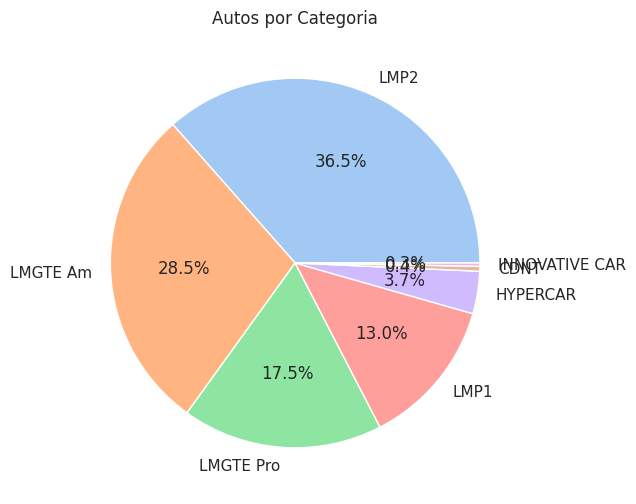

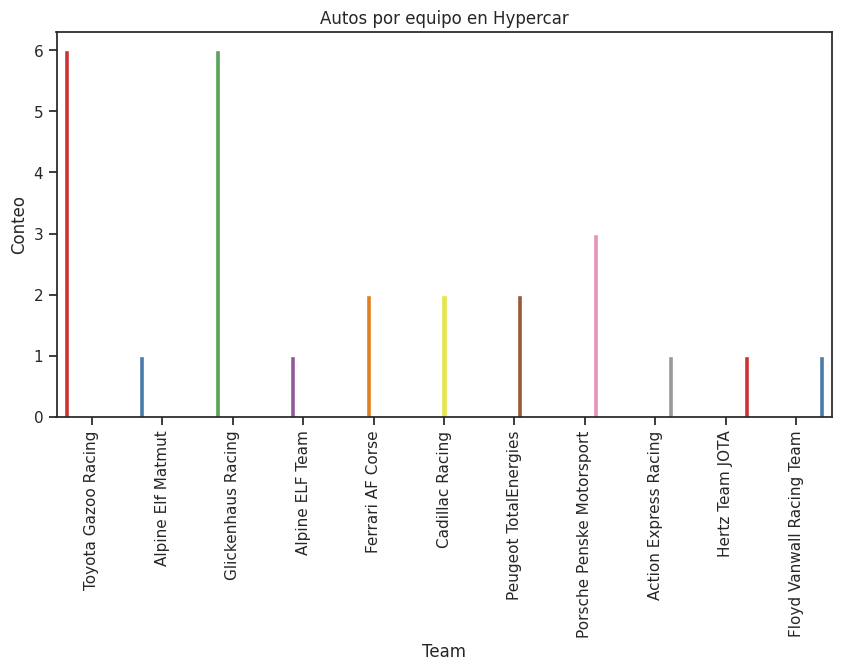

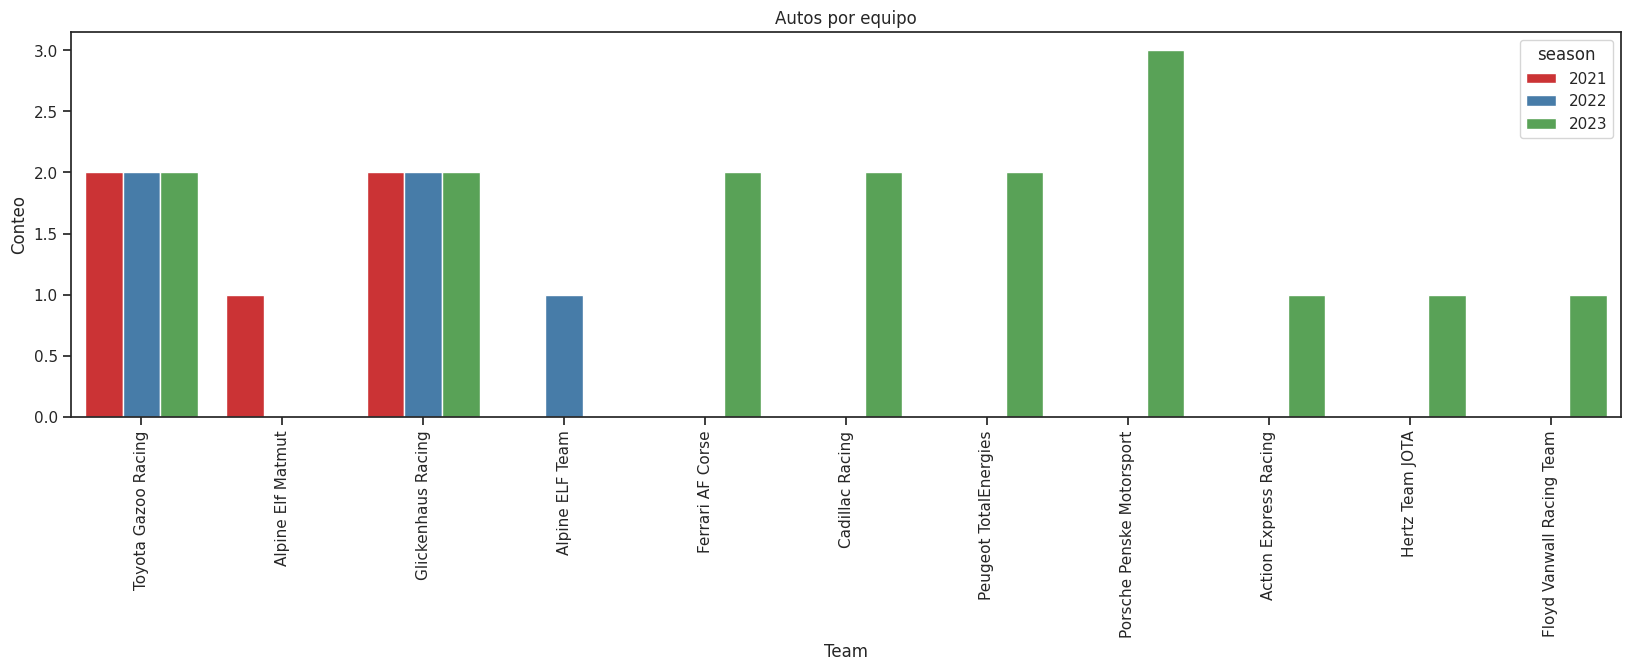

In [484]:
plt.figure(figsize=(10,6))
plt.pie(LeMans['class'].value_counts(), labels=LeMans['class'].value_counts().index, autopct='%1.1f%%')
plt.title('Autos por Categoria')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=LeMans_HYPERCAR, x=LeMans_HYPERCAR['team'], hue=LeMans_HYPERCAR['team'], palette='Set1', dodge=True)
plt.title('Autos por equipo en Hypercar')
plt.xlabel('Team')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 5))
sns.countplot(data=LeMans_HYPERCAR, x=LeMans_HYPERCAR['team'], hue=LeMans_HYPERCAR['season'], palette='Set1', dodge=True)
plt.title('Autos por equipo')
plt.xlabel('Team')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.show()




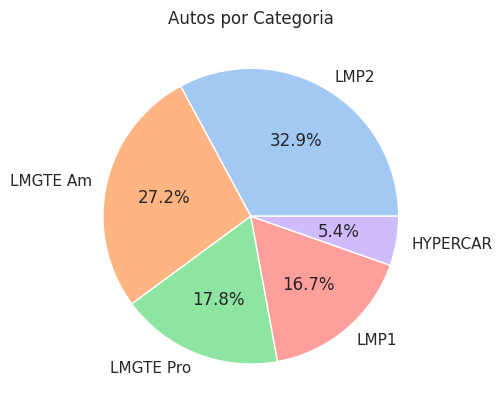

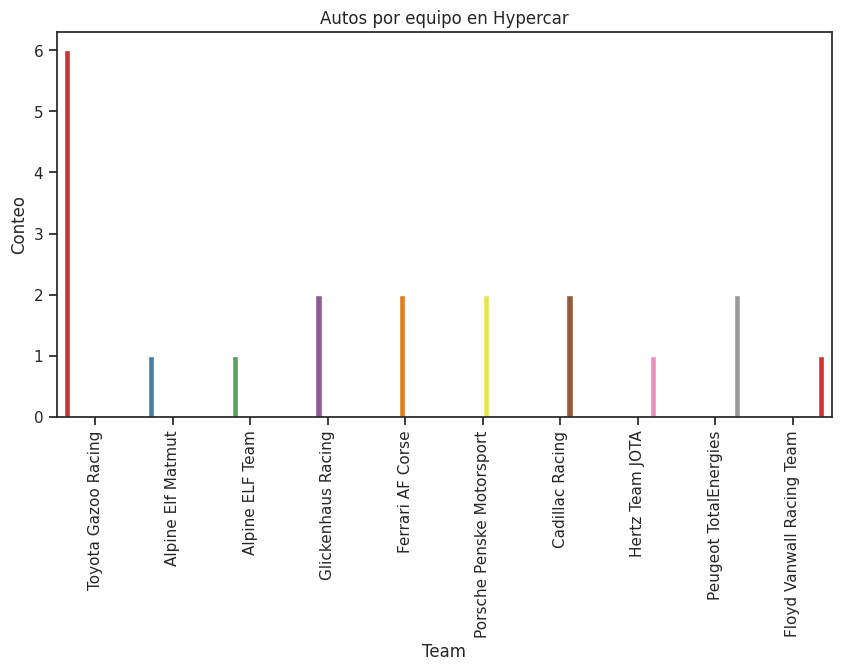

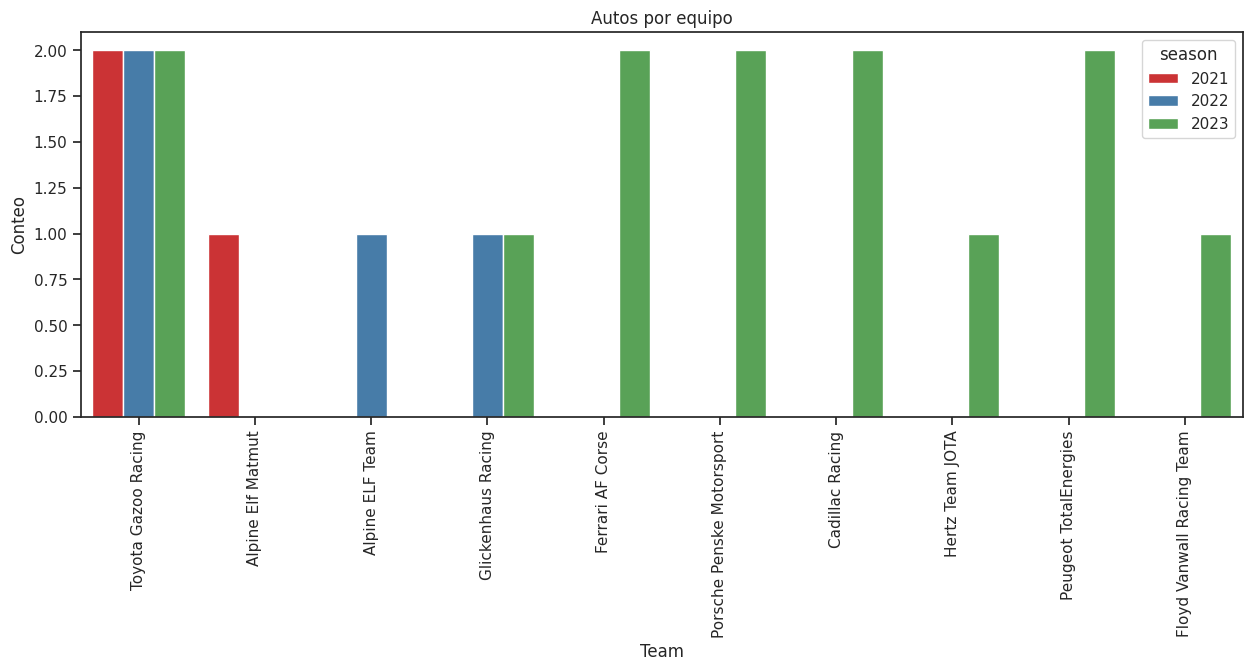

In [485]:
plt.pie(Spa['class'].value_counts(), labels=Spa['class'].value_counts().index, autopct='%1.1f%%')
plt.title('Autos por Categoria')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=Spa_HYPERCAR, x=Spa_HYPERCAR['team'], hue=Spa_HYPERCAR['team'], palette='Set1', dodge=True)
plt.title('Autos por equipo en Hypercar')
plt.xlabel('Team')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15, 5))
sns.countplot(data=Spa_HYPERCAR, x=Spa_HYPERCAR['team'], hue=Spa_HYPERCAR['season'], palette='Set1', dodge=True)
plt.title('Autos por equipo')
plt.xlabel('Team')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.show()

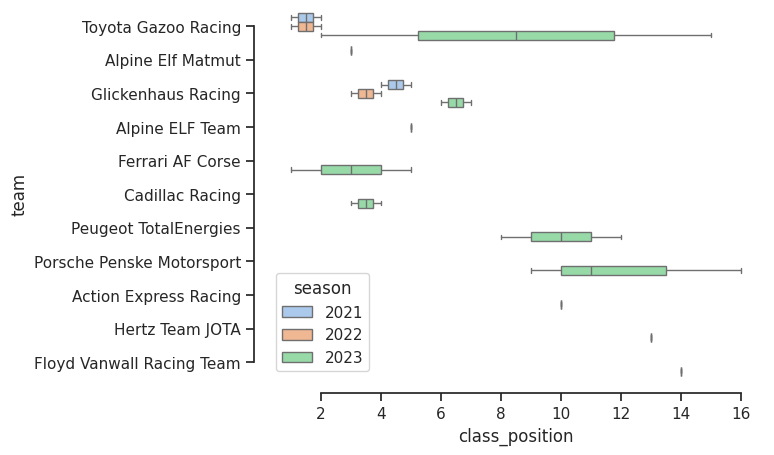

In [486]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="class_position", y='team', hue='season', data=LeMans_HYPERCAR)
sns.despine(offset=10, trim=True)

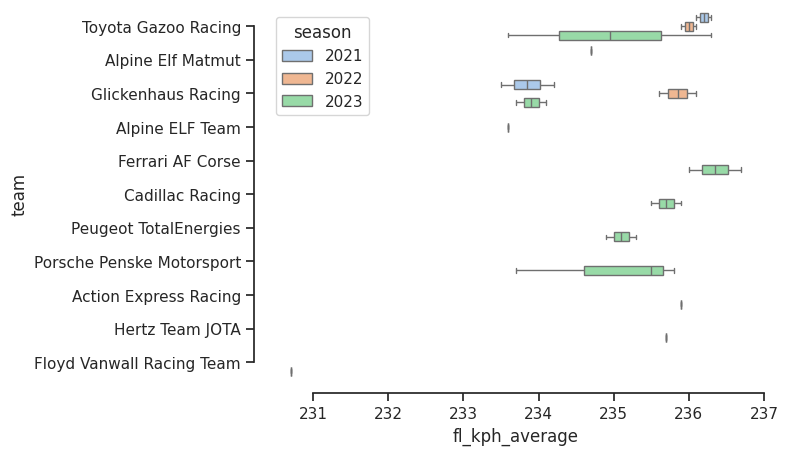

In [487]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="fl_kph_average", y='team', hue='season', data=LeMans_HYPERCAR)
sns.despine(offset=10, trim=True)

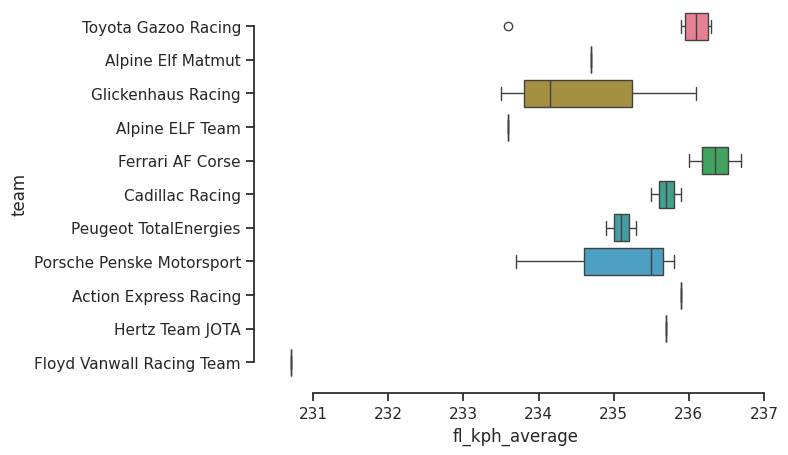

In [488]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="fl_kph_average", y='team', hue='team', data=LeMans_HYPERCAR)
sns.despine(offset=10, trim=True)


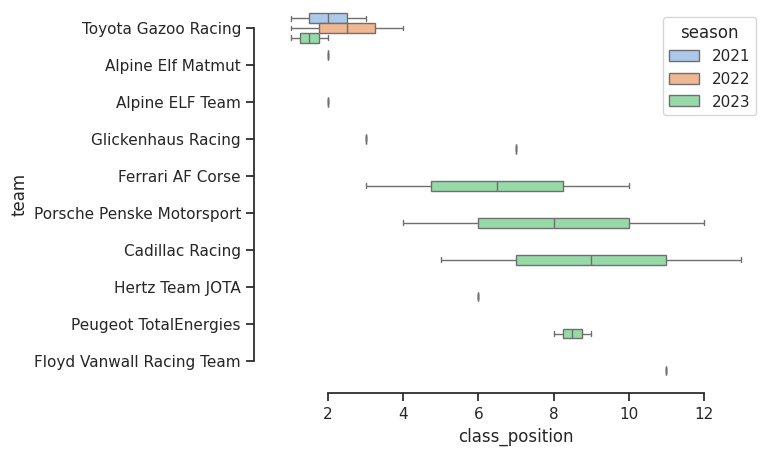

In [489]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="class_position", y='team', hue='season', data=Spa_HYPERCAR)
sns.despine(offset=10, trim=True)

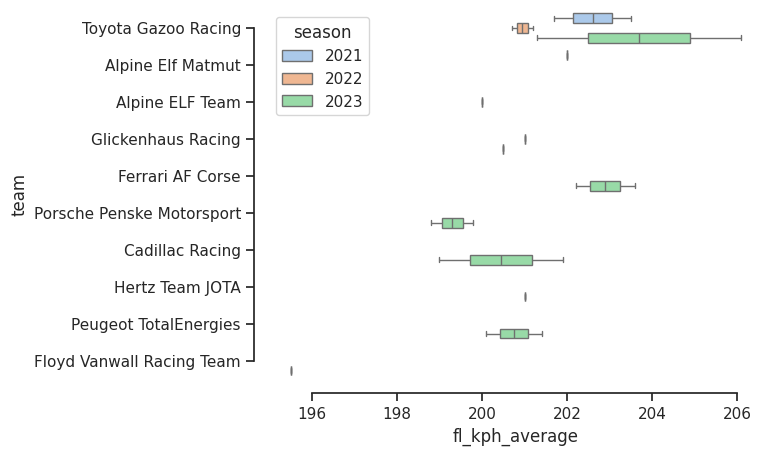

In [490]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="fl_kph_average", y='team', hue='season', data=Spa_HYPERCAR)
sns.despine(offset=10, trim=True)

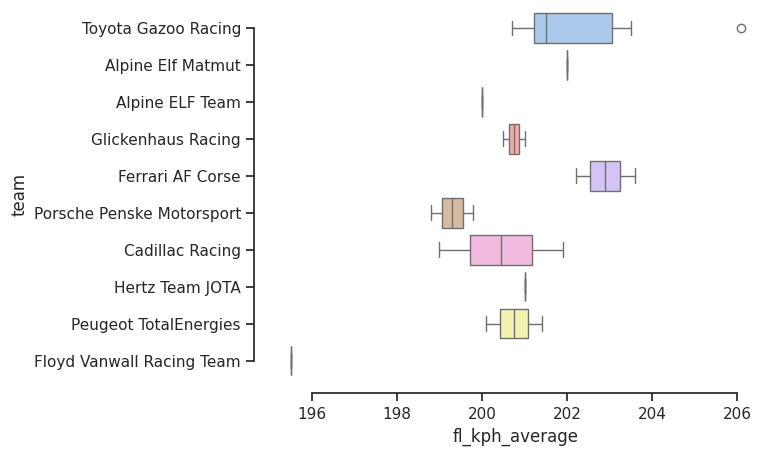

In [491]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="fl_kph_average", y='team', hue='team', data=Spa_HYPERCAR)
sns.despine(offset=10, trim=True)

# Modelos Predictivos

Se utilizaran 3 modelos distintos de prediccion para ver cual es el mas efectivo de estos para predecir quien seria el posible ganador de cada carrera.

Se utilizaran las tablas de LeMans, Spa y la general en dichos modelos

## Random Forest Classifier (RFC)

In [492]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Crear una nueva columna 'is_first' que indique si 'class_position' es 1 (ganador en su clase)
LeMans['is_first'] = (LeMans['class_position'] == 1).astype(int)

# Seleccionar las características y la nueva variable objetivo
features = ['tyres', 'event_duration', 'fl_lap_number', 'fl_kph_average']
target = 'is_first'

# Codificar la columna 'tyres'
LeMans['tyres'] = LabelEncoder().fit_transform(LeMans['tyres'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = LeMans[features]
y = LeMans[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo de Random Forest
clf = RandomForestClassifier(random_state=490)
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

<ipython-input-492-191958a0a15d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LeMans['is_first'] = (LeMans['class_position'] == 1).astype(int)
<ipython-input-492-191958a0a15d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LeMans['tyres'] = LabelEncoder().fit_transform(LeMans['tyres'])


Accuracy: 0.933649289099526
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       201
           1       0.00      0.00      0.00        10

    accuracy                           0.93       211
   macro avg       0.48      0.49      0.48       211
weighted avg       0.91      0.93      0.92       211



In [493]:
# Crear una nueva columna 'is_first' que indique si 'class_position' es 1 (ganador en su clase)
Spa['is_first'] = (Spa['class_position'] == 1).astype(int)

# Seleccionar las características y la nueva variable objetivo
features = ['tyres', 'event_duration', 'fl_lap_number', 'fl_kph_average']
target = 'is_first'

# Codificar la columna 'tyres'
Spa['tyres'] = LabelEncoder().fit_transform(Spa['tyres'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = Spa[features]
y = Spa[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo de Random Forest
clf = RandomForestClassifier(random_state=260)
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

<ipython-input-493-f8d3f94269d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spa['is_first'] = (Spa['class_position'] == 1).astype(int)
<ipython-input-493-f8d3f94269d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spa['tyres'] = LabelEncoder().fit_transform(Spa['tyres'])


Accuracy: 0.8660714285714286
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       101
           1       0.00      0.00      0.00        11

    accuracy                           0.87       112
   macro avg       0.45      0.48      0.46       112
weighted avg       0.81      0.87      0.84       112



In [494]:
# Crear una nueva columna 'is_first' que indique si 'class_position' es 1 (ganador en su clase)
df['is_first'] = (df['class_position'] == 1).astype(int)

# Seleccionar las características y la nueva variable objetivo
features = ['tyres', 'event_duration', 'fl_lap_number', 'fl_kph_average']
target = 'is_first'

# Codificar la columna 'tyres'
df['tyres'] = LabelEncoder().fit_transform(df['tyres'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo de Random Forest
clf = RandomForestClassifier(random_state=2120)
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8737650933040615
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       809
           1       0.19      0.04      0.07       102

    accuracy                           0.87       911
   macro avg       0.54      0.51      0.50       911
weighted avg       0.81      0.87      0.84       911



## Regresion Logistica

In [495]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Analizamos los dato de LeMans
X = LeMans[features]
y = LeMans['is_first']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.95260663507109
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       201
           1       0.00      0.00      0.00        10

    accuracy                           0.95       211
   macro avg       0.48      0.50      0.49       211
weighted avg       0.91      0.95      0.93       211



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [496]:
# Analizamos los dato de Spa
X = Spa[features]
y = Spa['is_first']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9017857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       101
           1       0.00      0.00      0.00        11

    accuracy                           0.90       112
   macro avg       0.45      0.50      0.47       112
weighted avg       0.81      0.90      0.86       112



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [497]:
# Analizamos los dato de df
X = df[features]
y = df['is_first']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8880351262349067
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       809
           1       0.00      0.00      0.00       102

    accuracy                           0.89       911
   macro avg       0.44      0.50      0.47       911
weighted avg       0.79      0.89      0.84       911



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Arbol de Decision

In [498]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Crear una nueva columna 'is_first' que indique si 'class_position' es 1 (ganador en su clase)
LeMans['is_first'] = (LeMans['class_position'] == 1).astype(int)

# Seleccionar las características y la nueva variable objetivo
features = ['tyres', 'event_duration', 'fl_lap_number', 'fl_kph_average']
target = 'is_first'

# Codificar la columna 'tyres'
LeMans['tyres'] = LabelEncoder().fit_transform(LeMans['tyres'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = LeMans[features]
y = LeMans[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=490)

# Crear y entrenar el modelo de Árbol de Decisión
clf = DecisionTreeClassifier(random_state=490)
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8862559241706162


<ipython-input-498-54fb11dda64e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LeMans['is_first'] = (LeMans['class_position'] == 1).astype(int)
<ipython-input-498-54fb11dda64e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LeMans['tyres'] = LabelEncoder().fit_transform(LeMans['tyres'])


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       200
           1       0.12      0.18      0.14        11

    accuracy                           0.89       211
   macro avg       0.54      0.55      0.54       211
weighted avg       0.91      0.89      0.90       211



In [499]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Crear una nueva columna 'is_first' que indique si 'class_position' es 1 (ganador en su clase)
Spa['is_first'] = (Spa['class_position'] == 1).astype(int)

# Seleccionar las características y la nueva variable objetivo
features = ['tyres', 'event_duration', 'fl_lap_number', 'fl_kph_average']
target = 'is_first'

# Codificar la columna 'tyres'
Spa['tyres'] = LabelEncoder().fit_transform(Spa['tyres'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = Spa[features]
y = Spa[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=490)

# Crear y entrenar el modelo de Árbol de Decisión
clf = DecisionTreeClassifier(random_state=260)
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7767857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       101
           1       0.06      0.09      0.07        11

    accuracy                           0.78       112
   macro avg       0.48      0.47      0.47       112
weighted avg       0.81      0.78      0.79       112



<ipython-input-499-c3b2d78ae299>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spa['is_first'] = (Spa['class_position'] == 1).astype(int)
<ipython-input-499-c3b2d78ae299>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spa['tyres'] = LabelEncoder().fit_transform(Spa['tyres'])


In [500]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Crear una nueva columna 'is_first' que indique si 'class_position' es 1 (ganador en su clase)
df['is_first'] = (df['class_position'] == 1).astype(int)

# Seleccionar las características y la nueva variable objetivo
features = ['tyres', 'event_duration', 'fl_lap_number', 'fl_kph_average']
target = 'is_first'

# Codificar la columna 'tyres'
df['tyres'] = LabelEncoder().fit_transform(df['tyres'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=490)

# Crear y entrenar el modelo de Árbol de Decisión
clf = DecisionTreeClassifier(random_state=2120)
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7914379802414928
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       816
           1       0.09      0.12      0.10        95

    accuracy                           0.79       911
   macro avg       0.49      0.49      0.49       911
weighted avg       0.81      0.79      0.80       911



## Conclusion

Tras las pruebas de los 3 modelos de prediccion se vio que el mas efectivo fue el de Regresion Logistica. Teniendo un efectividad de 0.95 para la tabla de LeMans, 0.90 en la tabla de Spa y un 0.89 en la tabla general